<a href="https://colab.research.google.com/github/Legacy560/MLTSA25_RWolynetz/blob/main/HW3/HW3_RWolynetz_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import pylab as pl
import glob
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
import statsmodels.api as sm
from pandas.plotting import scatter_matrix
import json
import os

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
pl.style.use("https://raw.githubusercontent.com/fedhere/MLTSA_FBianco/master/fbb.mplstyle")

TASK 1: data ingestion

TASK 2: data exploration

TASK 3: test each time series for stationarity

TASK 4: Inspect the partial autocorrelation with plots

TASK 5: fit an ARIMA model to each time series with appriopriate parameters

# REMEMBER: CAPTIONS FOR EVERY PLOT!!!

#  TASK 1: data ingestion

In [ ]:
# download kaggle economic data
# https://www.kaggle.com/borismarjanovic/price-volume-data-for-all-us-stocks-etfs/data#a.us.txt


In [ ]:
!pip install kaggle

In [ ]:
from google.colab import drive

drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
cd /content

/content


In [ ]:
ls kaggle.json

ls: cannot access 'kaggle.json': No such file or directory


In [ ]:
cd gdrive/My\ Drive/Graduate School/Graduate Year 2/Spring 2025/My Courses/PHYS 664: Machine Learning for Time Series Analysis/Python Notebooks/

/content/gdrive/My Drive/Graduate School/Graduate Year 2/Spring 2025/My Courses/PHYS 664: Machine Learning for Time Series Analysis/Python Notebooks


In [ ]:
ls

'Class 7 Stochastic processes.ipynb'               MLTSA25/
 Homework/                                         python_bootcamp_MLTSA25_RWolynetz.ipynb
 kaggle.json                                      'WolynetzR Using Gemini in Colab .ipynb'
'linear regression_ solutions_grb_inclass.ipynb'  'Workshop: Plotting and Linear Regression.ipynb'


In [ ]:
ls kaggle.json


kaggle.json


In [ ]:

envs = json.load(open("kaggle.json", "r"))
os.environ["KAGGLE_USERNAME"] = envs['username']
os.environ["KAGGLE_KEY"] = envs['key']


## now make a director to save the MLTSA 2025 data into - call it MLTSA25

In [ ]:
!mkdir MLTSA25

mkdir: cannot create directory ‘MLTSA25’: File exists


In [ ]:
cd MLTSA25

/content/gdrive/My Drive/Graduate School/Graduate Year 2/Spring 2025/My Courses/PHYS 664: Machine Learning for Time Series Analysis/Python Notebooks/MLTSA25


## make a HW3 folder

NOTE: I already have a folder for HW3 in my google drive, so I am just going to use that.

In [ ]:
!mkdir HW3

In [ ]:
cd -


/content/gdrive/My Drive/Graduate School/Graduate Year 2/Spring 2025/My Courses/PHYS 664: Machine Learning for Time Series Analysis/Python Notebooks


In [ ]:
ls

'Class 7 Stochastic processes.ipynb'               MLTSA25/
 Homework/                                         python_bootcamp_MLTSA25_RWolynetz.ipynb
 kaggle.json                                      'WolynetzR Using Gemini in Colab .ipynb'
'linear regression_ solutions_grb_inclass.ipynb'  'Workshop: Plotting and Linear Regression.ipynb'


In [ ]:
cd Homework/Homework 3

/content/gdrive/My Drive/Graduate School/Graduate Year 2/Spring 2025/My Courses/PHYS 664: Machine Learning for Time Series Analysis/Python Notebooks/Homework/Homework 3


In [ ]:
ls

Data/  HW3_RWolynetz_ARIMA.ipynb      price-volume-data-for-all-us-stocks-etfs.zip
ETFs/  HW3_RWolynetz_FBProphet.ipynb  Stocks/


## download the kaggle data _note: you may need to go to the specificl challenge and agree to the terms of competition_

In [ ]:
!kaggle datasets download borismarjanovic/price-volume-data-for-all-us-stocks-etfs

Dataset URL: https://www.kaggle.com/datasets/borismarjanovic/price-volume-data-for-all-us-stocks-etfs
License(s): CC0-1.0
price-volume-data-for-all-us-stocks-etfs.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!ls

Data  HW3_RWolynetz_ARIMA.ipynb      price-volume-data-for-all-us-stocks-etfs.zip
ETFs  HW3_RWolynetz_FBProphet.ipynb  Stocks


## uncompress the file

In [ ]:
!unzip price-volume-data-for-all-us-stocks-etfs.zip

Archive:  price-volume-data-for-all-us-stocks-etfs.zip
replace Data/ETFs/aadr.us.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
# use glob to sort the files alphabetically
alltss = []

allfiles = np.sort(np.array(glob.glob("Data/Stocks/*.txt")))
tss = pd.read_csv(allfiles[0])[["Date", "Close"]].rename({"Close":
              allfiles[0].replace(".txt",
                                  "").replace("Data/Stocks/",
                                              "")}, axis=1)
for f in allfiles[1:11]:
    print(f)
    name = f.replace(".txt","").replace("Data/Stocks/", "")

    tss = tss.merge(pd.read_csv(f)[["Date", "Close"]].rename({"Close":
                                                              name},
                                        axis=1), on="Date")
tss.set_index("Date", inplace=True)


Data/Stocks/aa.us.txt
Data/Stocks/aaap.us.txt
Data/Stocks/aaba.us.txt
Data/Stocks/aac.us.txt
Data/Stocks/aal.us.txt
Data/Stocks/aamc.us.txt
Data/Stocks/aame.us.txt
Data/Stocks/aan.us.txt
Data/Stocks/aaoi.us.txt
Data/Stocks/aaon.us.txt


Now you have a dataframe with 10 columns of data and two years of measurements

# TASK 2:  data exploration

- inspect the files by, e.g., printing some content and printing their statistical properties
- plot each time series (ts)
- inspect correlation

In [ ]:
# prompt: print the statistical properties of the dataframe tss
tss.describe()


a.us       aa.us     aaap.us     aaba.us      aac.us      aal.us  \
count  447.000000  447.000000  447.000000  447.000000  447.000000  447.000000   
mean    48.787649   28.434510   36.750649   44.218737   13.871387   41.942794   
std      9.034588    8.818682   10.642928   10.756682    6.071919    6.066181   
min     34.193000   14.831000   23.720000   26.760000    6.050000   24.916000   
25%     41.239500   20.950000   29.720000   36.660000    8.040000   37.982500   
50%     46.228000   28.080000   35.020000   42.080000   11.400000   42.059000   
75%     55.956500   34.595000   38.525000   49.640000   19.600000   46.530000   
max     68.370000   50.080000   81.000000   72.220000   24.720000   53.992000   

          aamc.us     aame.us      aan.us     aaoi.us     aaon.us  
count  447.000000  447.000000  447.000000  447.000000  447.000000  
mean    45.783325    3.875367   29.626879   33.240678   30.040465  
std     31.608792    0.432411    7.248519   22.352541    5.021530  
min     11.340000    3.100000   20.203000    8.800000   19.267000  
25%     15.555000    3.562000   23.769500   16.065000   26.463500  
50%     33.650000    3.800000   26.839000   22.870000   30.253000  
75%     76.250000    4.129100   34.966000   52.645000   34.314000  
max    109.350000    4.944600   46.248000   99.610000   38.100000

In [ ]:
# inspect the file
tss.head()


a.us   aa.us  aaap.us  aaba.us  aac.us  aal.us  aamc.us  \
Date                                                                    
2015-11-11  36.901  17.779    24.50    33.38   22.56  43.524    20.75   
2015-11-12  36.734  17.206    25.00    33.23   22.50  43.044    19.17   
2015-11-13  36.030  17.581    25.26    32.19   22.68  42.603    17.50   
2015-11-16  36.577  18.242    25.02    32.94   22.58  41.994    15.58   
2015-11-17  37.607  18.197    24.62    32.86   22.52  41.473    12.59   

            aame.us  aan.us  aaoi.us  aaon.us  
Date                                           
2015-11-11   4.7960  24.649    16.76   24.252  
2015-11-12   4.8951  24.182    16.11   23.652  
2015-11-13   4.6672  23.795    16.60   23.110  
2015-11-16   4.8455  23.923    16.93   23.130  
2015-11-17   4.9150  23.418    16.68   23.268

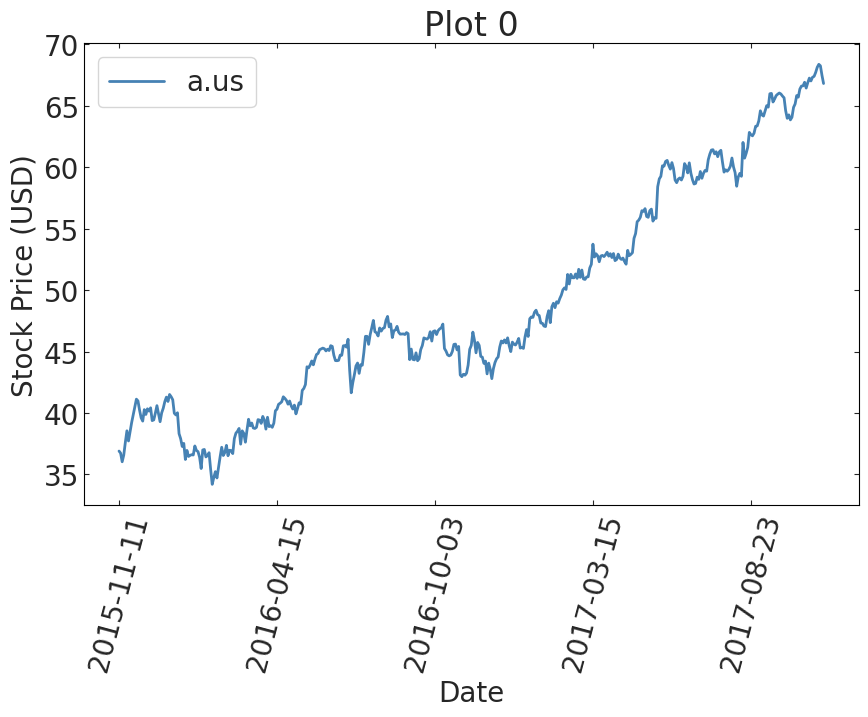

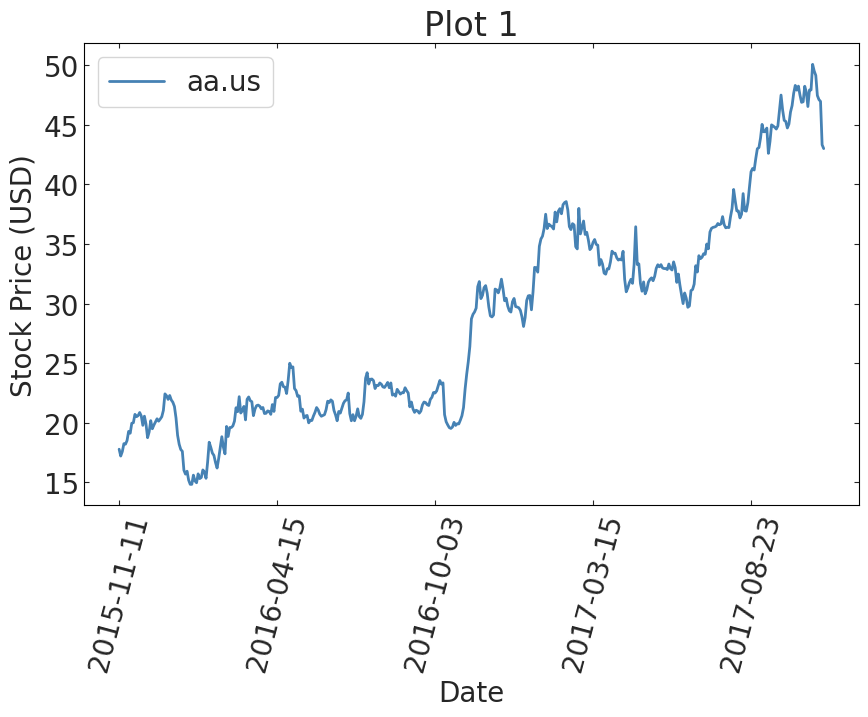

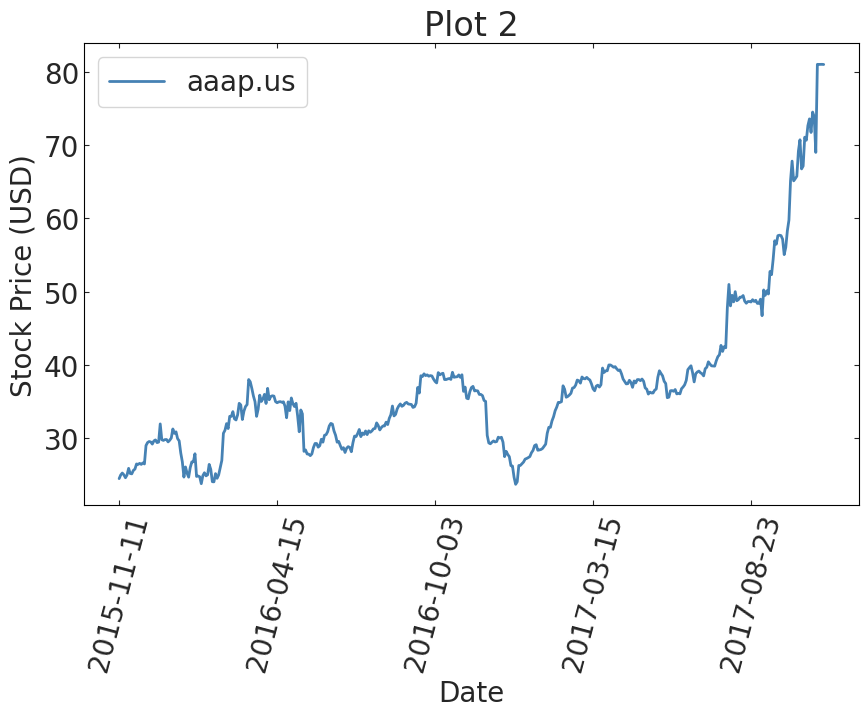

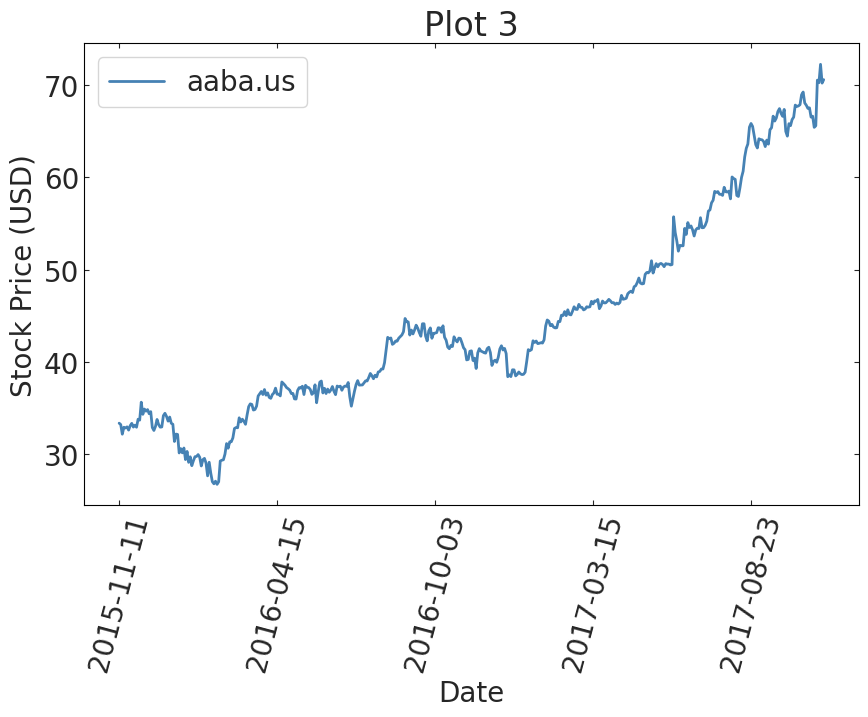

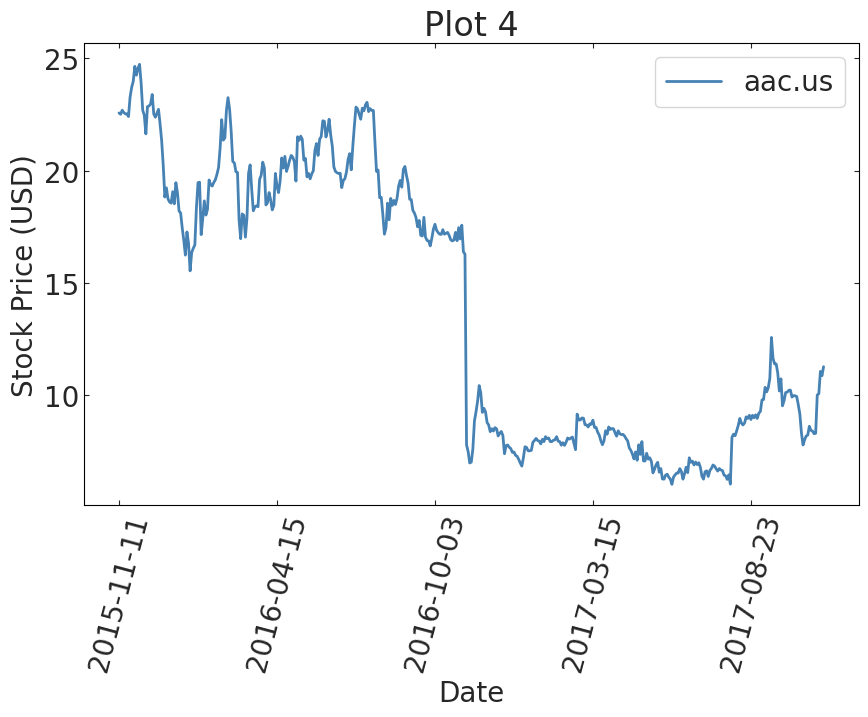

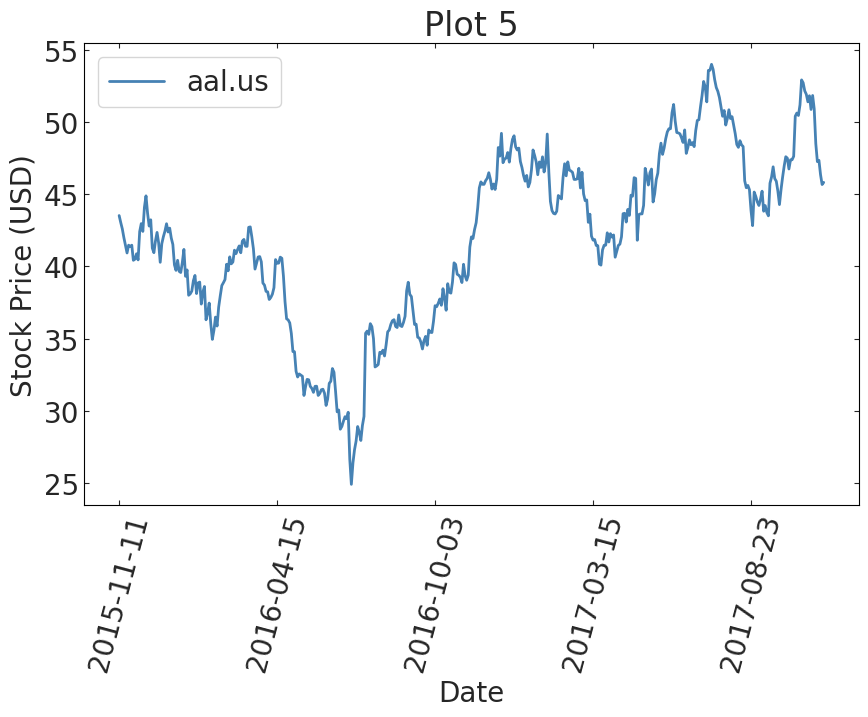

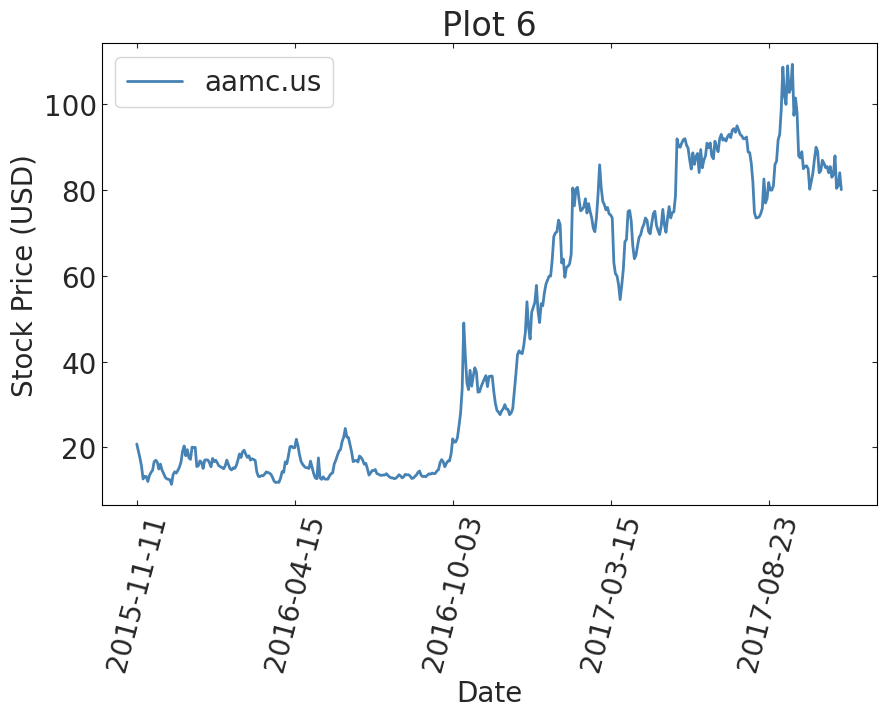

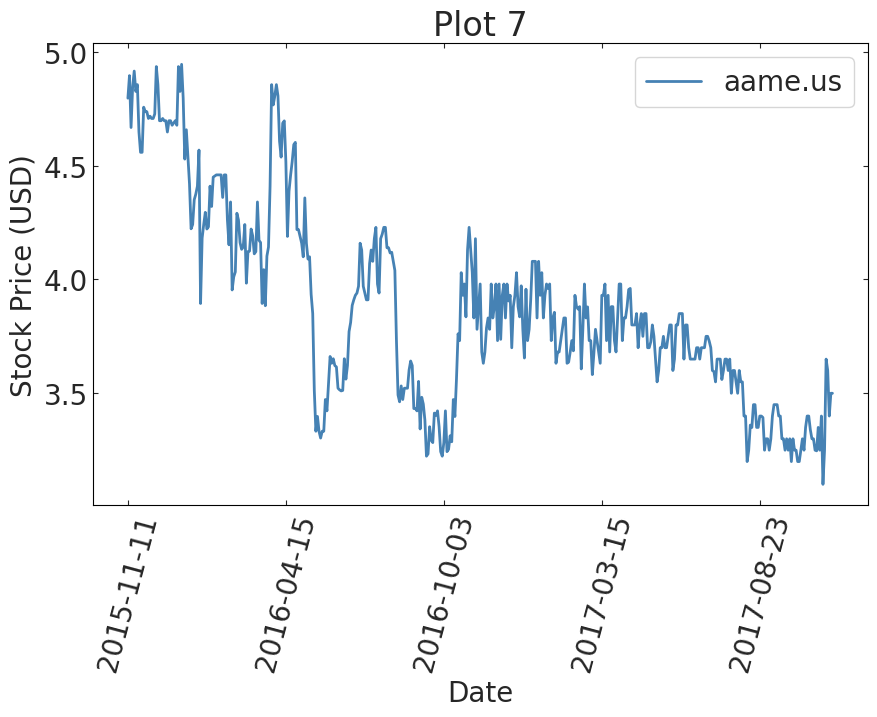

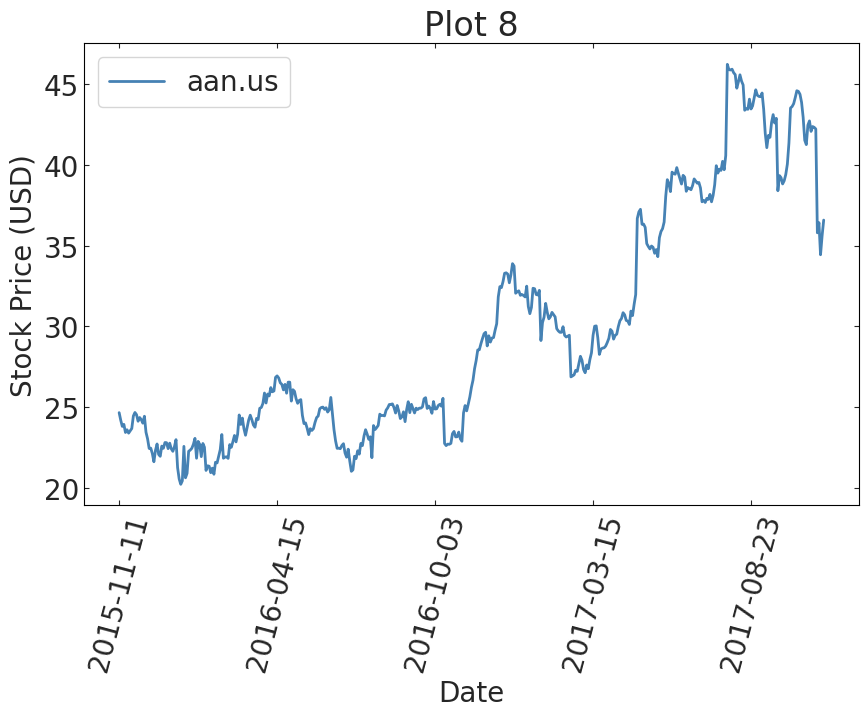

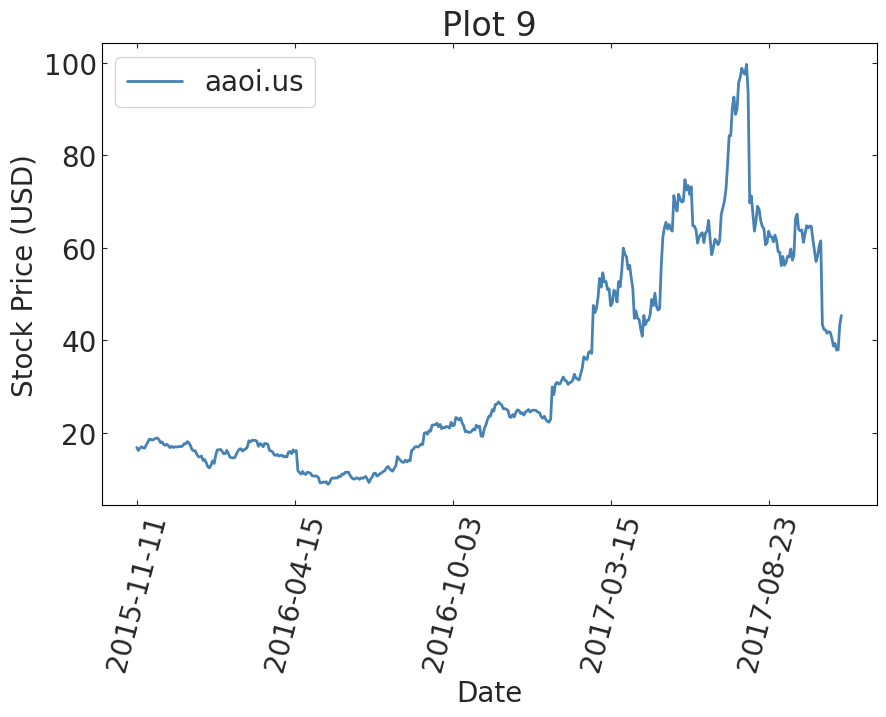

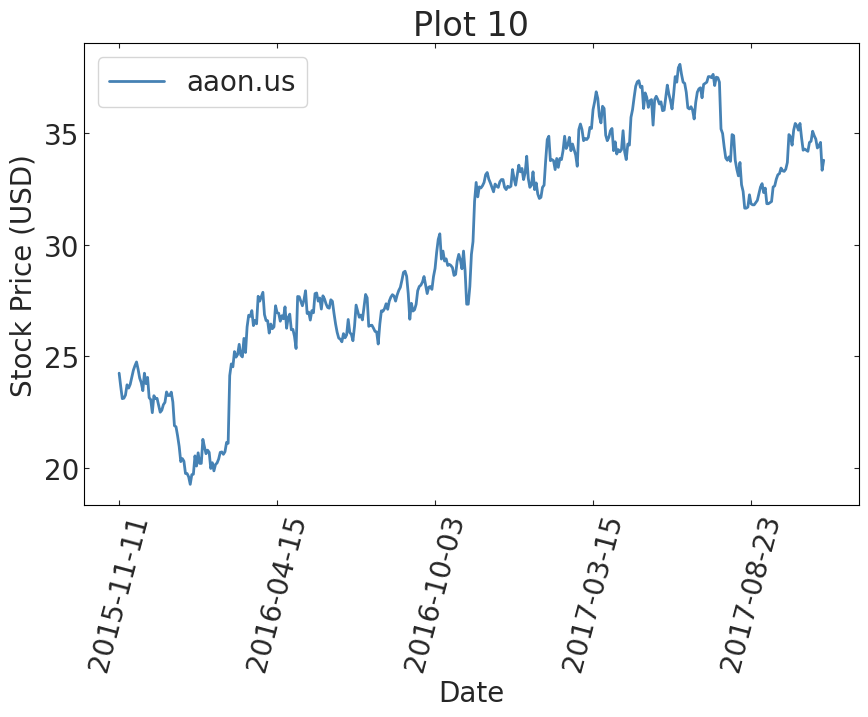

In [ ]:
for index, c in enumerate(tss.columns):
    tss.plot(y=c, rot=75, lw=2)
    pl.title("Plot " + str(index))
    pl.ylabel("Stock Price (USD)")
    pl.show()


Figure 1: These are plots of the prices of all 11 stocks in this dataset from 2015 to 2017. Notice that there are evident trends and seasonality amongst all of these stocks. AAME and AAC appear to be the only stocks with any downward trend, the rest of the stocks exhibit upward trends.

### visualizing correlations

use ```pandas.plotting.scatter_matrix```  to look at the relationship between lightcurves

plot the pairwise correlation as a heatmap using ```pl.imshow()```. You can access the pairwise correlation with the dataframe method ```df.corr()```

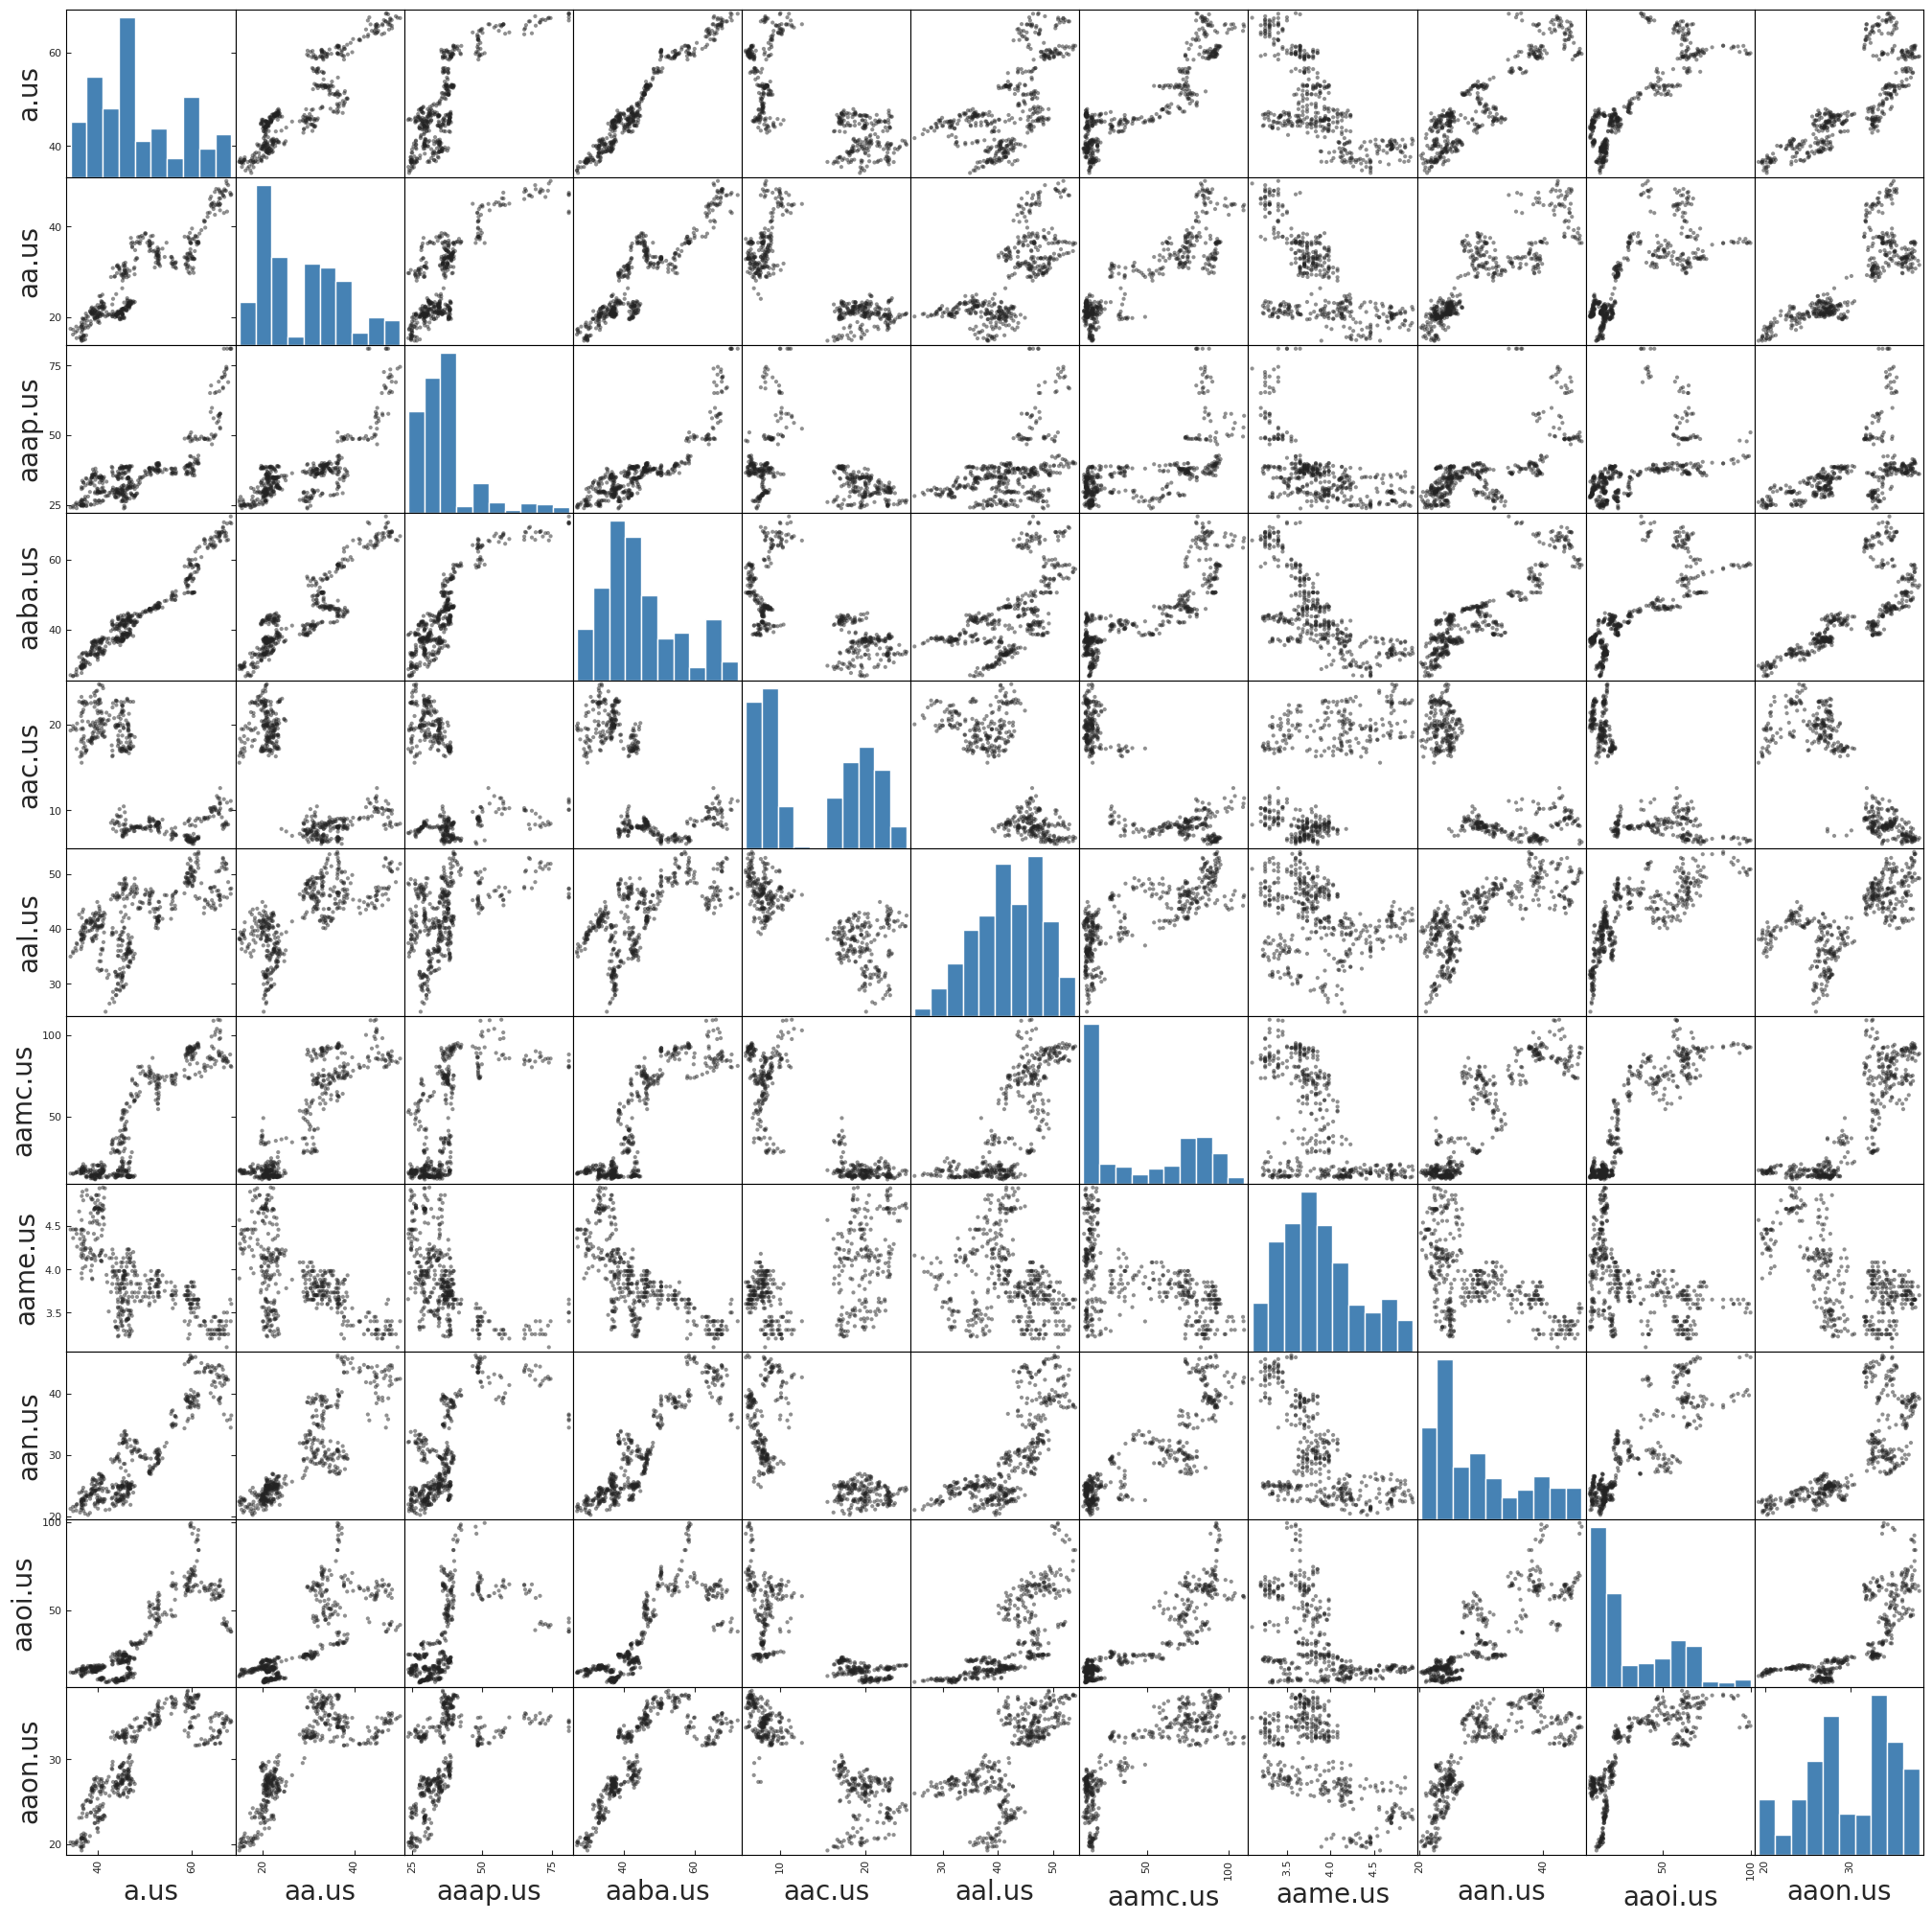

In [ ]:
scatter_matrix(tss, figsize=(25,25), color="#222222"); #This plots a scatterplot matrix


Figure 2: This is a scatterplot matrix of all the stocks in our dataset. Each row of the matrix depicts the values of one stock against all the others in respective scatterplots. This histograms along the main diagonal represent the distribution of each stock's prices. These plots can provide a graphical representation of correlation between stock prices such as: a and aa, and aaoi and aaba to name a few. These are shown in the plots as upward or downward trends of points.  

In [ ]:
print("Correlation matrix of 2015-2017 stock values")
tss.corr()

Correlation matrix of 2015-2017 stock values


a.us     aa.us   aaap.us   aaba.us    aac.us    aal.us   aamc.us  \
a.us     1.000000  0.902139  0.800310  0.973457 -0.721867  0.621041  0.897263   
aa.us    0.902139  1.000000  0.776600  0.904210 -0.791137  0.713229  0.893952   
aaap.us  0.800310  0.776600  1.000000  0.872134 -0.423021  0.451520  0.621329   
aaba.us  0.973457  0.904210  0.872134  1.000000 -0.670578  0.612989  0.849972   
aac.us  -0.721867 -0.791137 -0.423021 -0.670578  1.000000 -0.785248 -0.868936   
aal.us   0.621041  0.713229  0.451520  0.612989 -0.785248  1.000000  0.780517   
aamc.us  0.897263  0.893952  0.621329  0.849972 -0.868936  0.780517  1.000000   
aame.us -0.699609 -0.606774 -0.573976 -0.709023  0.510986 -0.219258 -0.544740   
aan.us   0.905395  0.873520  0.696179  0.903785 -0.765267  0.756808  0.881631   
aaoi.us  0.851239  0.766459  0.560427  0.809059 -0.780147  0.746505  0.904166   
aaon.us  0.809409  0.809966  0.503524  0.755263 -0.876358  0.671816  0.853182   

          aame.us    aan.us   aaoi.us   aaon.us  
a.us    -0.699609  0.905395  0.851239  0.809409  
aa.us   -0.606774  0.873520  0.766459  0.809966  
aaap.us -0.573976  0.696179  0.560427  0.503524  
aaba.us -0.709023  0.903785  0.809059  0.755263  
aac.us   0.510986 -0.765267 -0.780147 -0.876358  
aal.us  -0.219258  0.756808  0.746505  0.671816  
aamc.us -0.544740  0.881631  0.904166  0.853182  
aame.us  1.000000 -0.585002 -0.496371 -0.612453  
aan.us  -0.585002  1.000000  0.860847  0.765596  
aaoi.us -0.496371  0.860847  1.000000  0.780400  
aaon.us -0.612453  0.765596  0.780400  1.000000

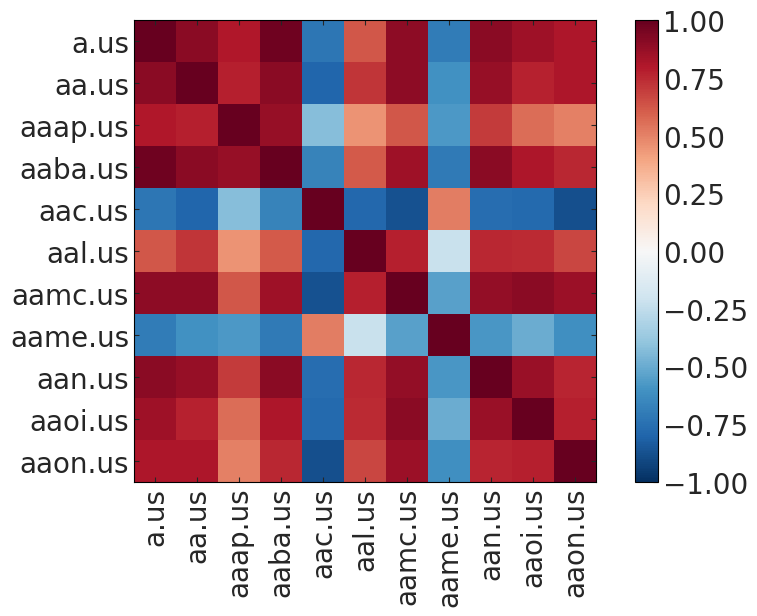

In [ ]:
#Show the correlation as a heatmap
pl.imshow(tss.corr(), clim=(-1,1), cmap="RdBu_r")
pl.xticks(range(len(tss.columns)), tss.columns, rotation=90)
pl.yticks(range(len(tss.columns)), tss.columns)
pl.colorbar()

Fig 3: This is a more graphical representation of the correlation matrix, a heatmap. Each square represents the correlation between the two respective stocks. Warmer colors represent more positive correlations, and cooler colors represent more negative correlations, as the scale on the right indicates. The dark red diagonal is the correlation of the stocks with themselves. Immediatly we can see that most of the stocks in this dataset are highly positively correlated with each other. This is especially evident in the upper left corner of the plot, which covers stocks a to aaba.

# TASK 3: test each time series for stationarity

## this will allow you to choose the parameter i in the ARIMA model: `i=0` for stationary time series, `i=1` for non stationary time series

The AD fuller test implementation which we saw in class is here
https://github.com/fedhere/MLTSA_FBianco/blob/main/CodeExamples/ARMA/testingARMA_ARIMA.ipynb

## testing for stationarity
test if each of these time series is stationary using the AD fuller test using `statsmodels.api.tsa.stattools.adfuller()`

```
for f in tss.columns:
    sm.tsa.stattools.adfuller(tss[c])
```

Have the code automatically print a statement about wheather the ts is stationary for each ts (for example in a for loop).

In [ ]:
threshold = 0.05
isStationary = []
print ("Stationarity results from the AD Fuller test at a p-value of 0.05")
for c in tss.columns:
    #Apply test
    result = sm.tsa.stattools.adfuller(tss[c])
    pvalue = result[1]
    if pvalue < threshold:
      #The TS that don't print are not stationary.
        print(c, "is stationary:", pvalue)
        isStationary.append(True)

    else:
        print(c, "is not stationary:", pvalue) # use the ADfuller test that we tried in class - that notebook is here  https://github.com/fedhere/MLTSA_FBianco/blob/main/CodeExamples/ARMA/testingARMA_ARIMA.ipynb
        isStationary.append(False)

Stationarity results from the AD Fuller test at a p-value of 0.05
a.us is not stationary: 0.9711053061077951
aa.us is not stationary: 0.8615583755460212
aaap.us is not stationary: 0.9990837483738163
aaba.us is not stationary: 0.9976818114588439
aac.us is not stationary: 0.4980216243419859
aal.us is not stationary: 0.507548899130731
aamc.us is not stationary: 0.8176042911117107
aame.us is stationary: 0.03955624128013099
aan.us is not stationary: 0.7303922201105053
aaoi.us is not stationary: 0.6114808797718178
aaon.us is not stationary: 0.6430042788480033


NOTE: keep track of which time series is stationary and which one is not - when you model with ARIMA you can set the second parameter to 0 if it is stationary

# TASK 4: Inspect the partial autocorrelation with plots -
## this will help you choose the value of the parameter p in the ARIMA model: `p=N` where N is the largest statistically significant lag in the partial autocorrelation


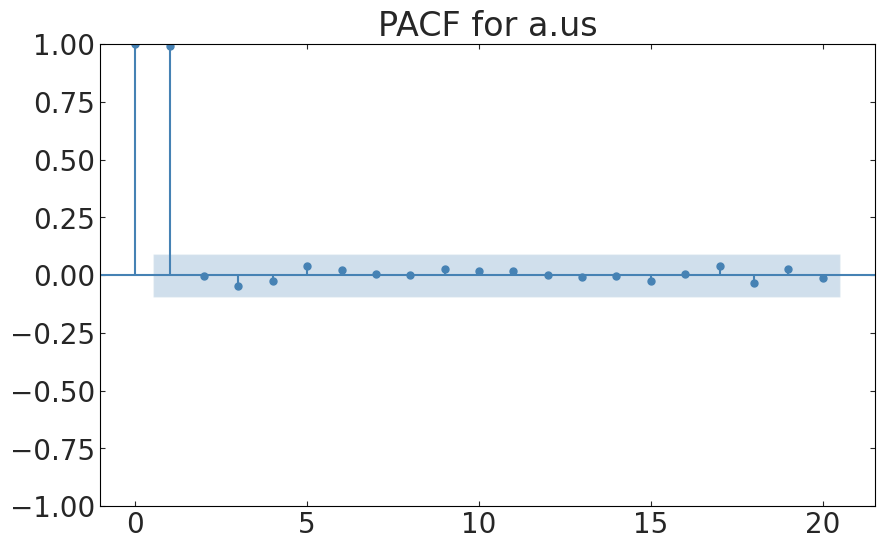

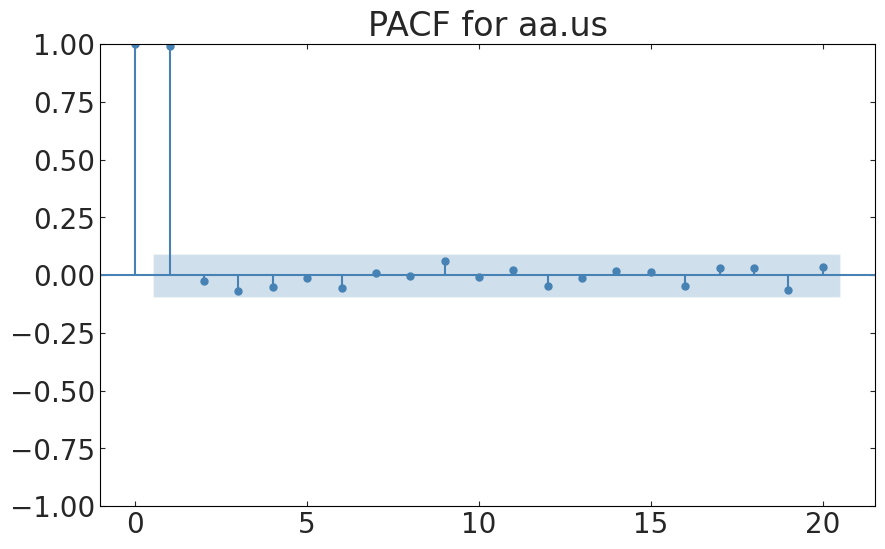

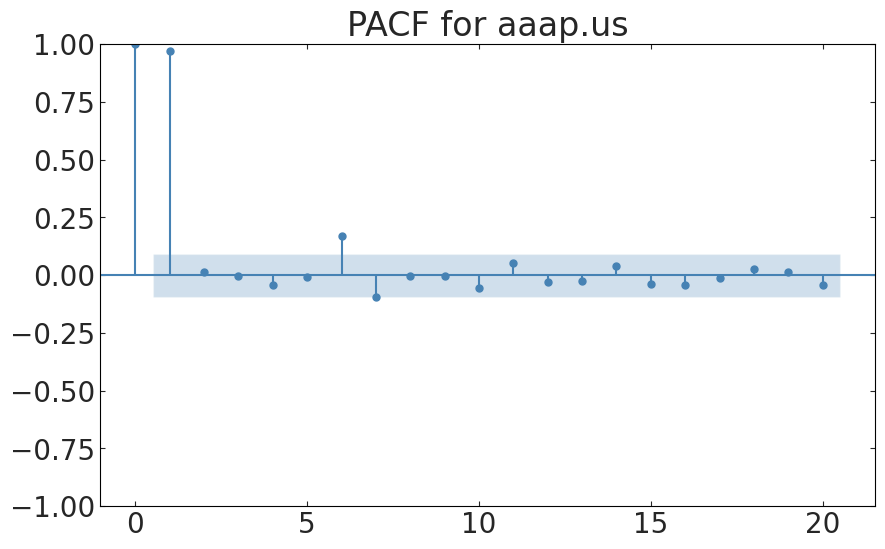

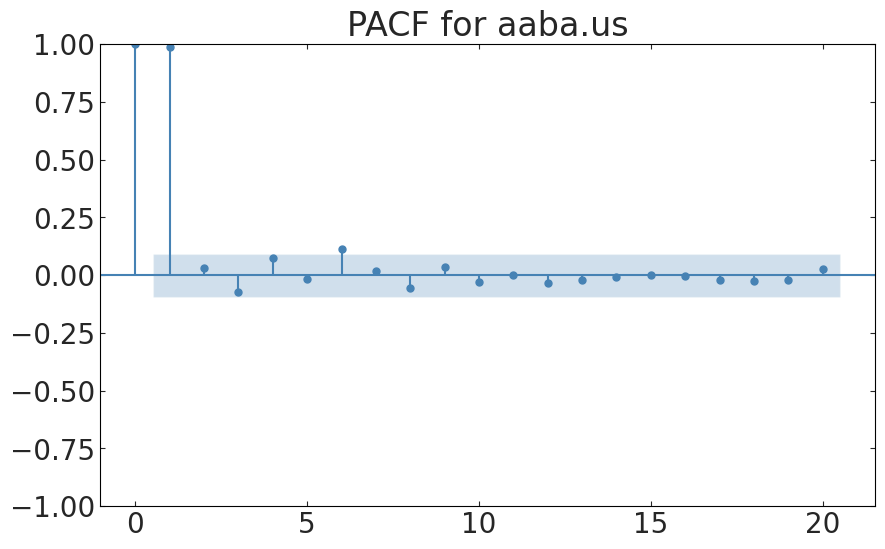

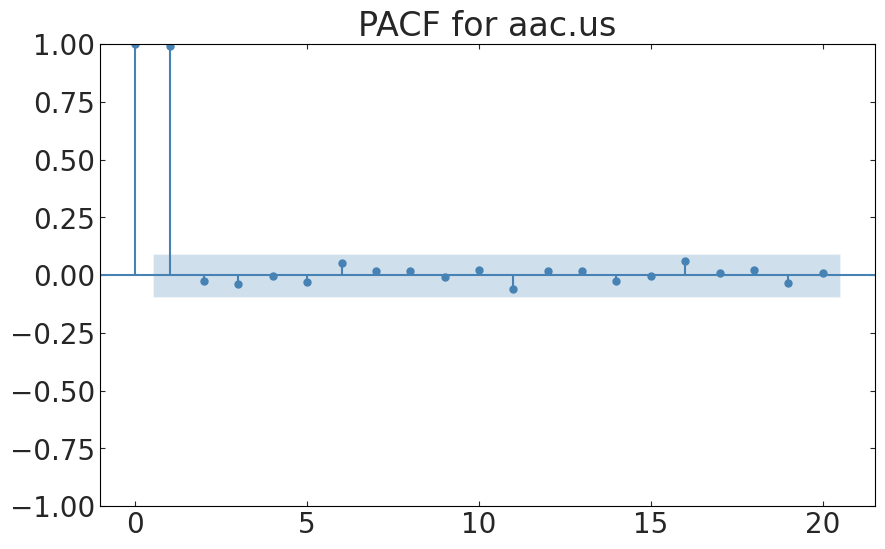

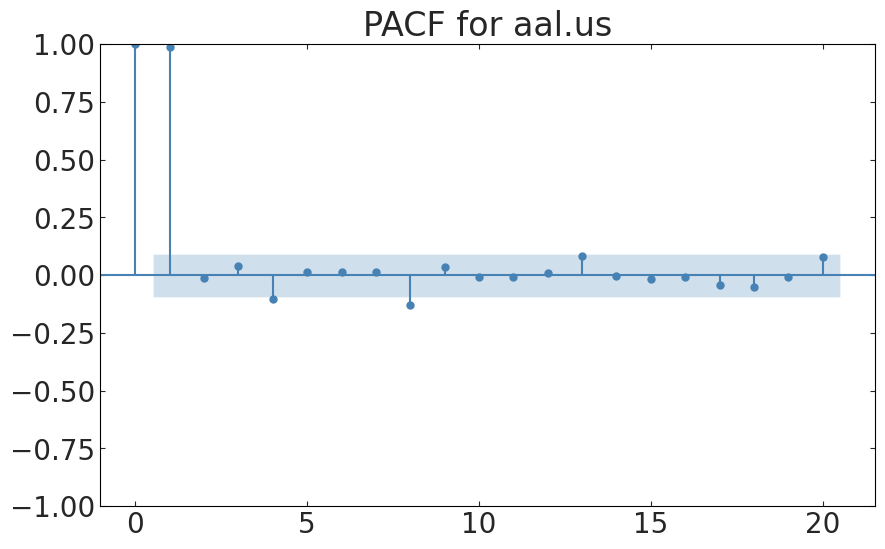

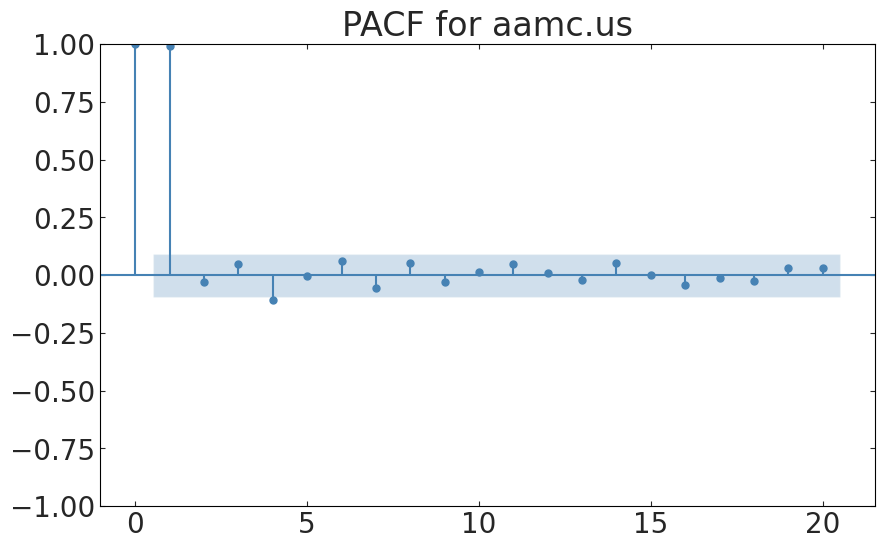

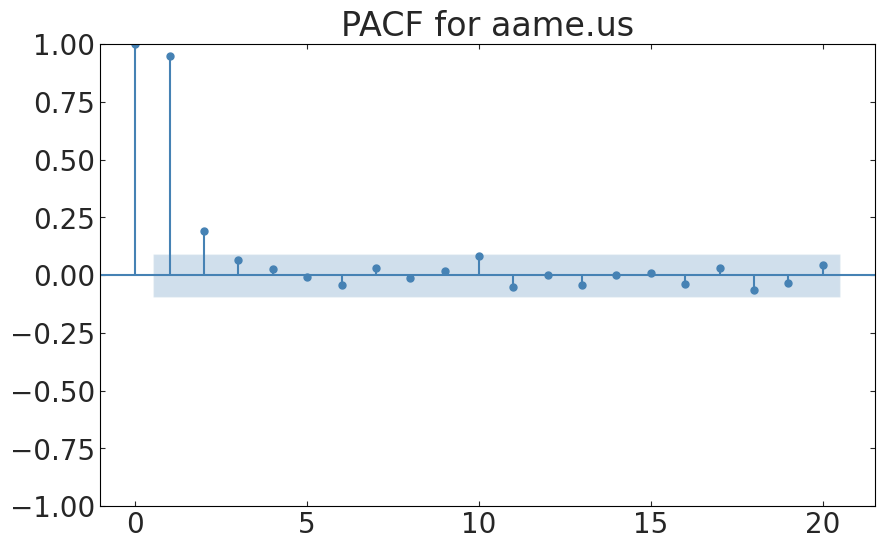

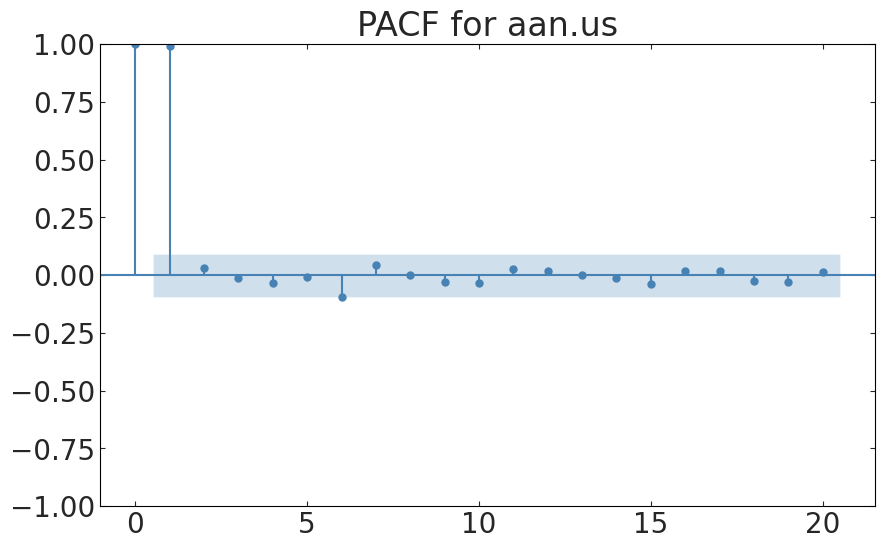

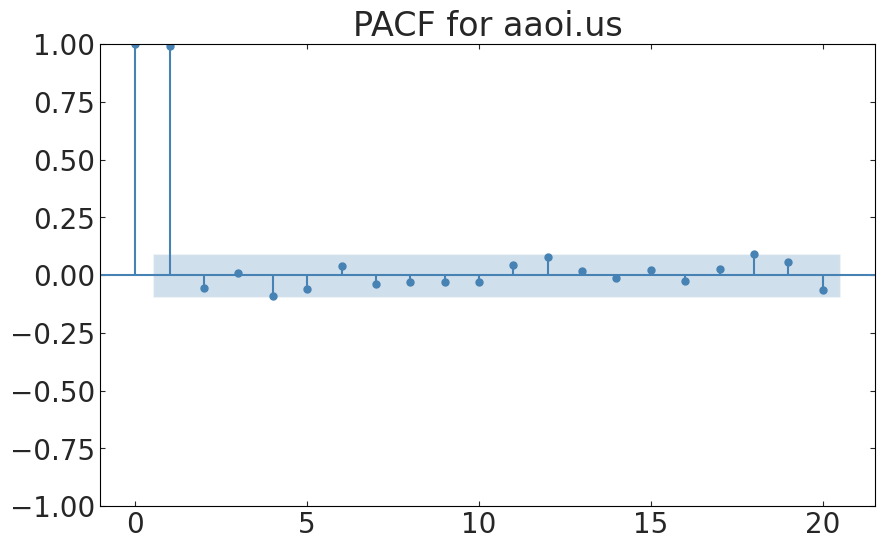

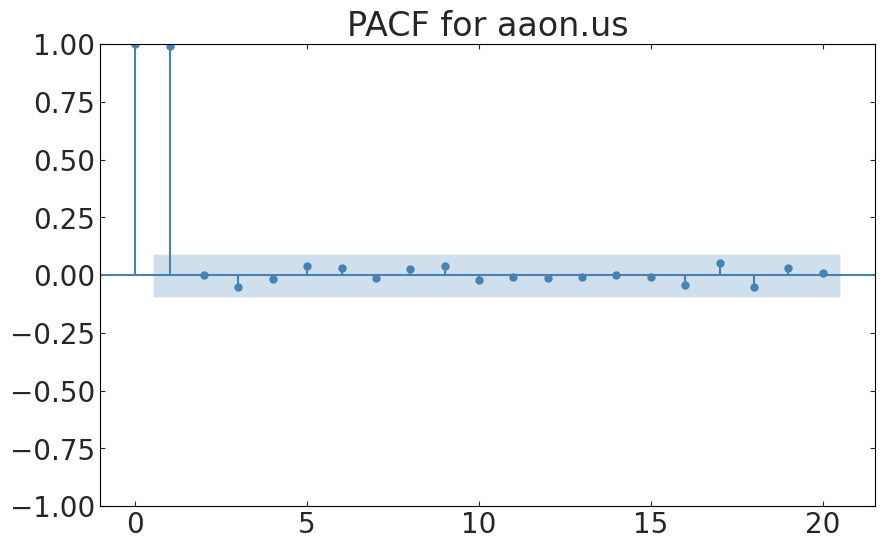

In [ ]:
#partial autocorrelatin plot

#sm.graphics.tsa.plot_pacf(tss["aal.us"], lags=20);

for c in tss.columns:
    sm.graphics.tsa.plot_pacf(tss[c], lags=20);
    pl.title("PACF for " + c)
    pl.show()
#Make a list of highest significant lags

lags = [1, 1, 7, 6, 1, 8, 4, 2, 6, 18, 1]

FIG 4: These are the partial autocorrelation plot for all the stocks. Each point on this plot represents the correlation of the time series with itself at the given lag. Points that appear outside the shaded blue region are significant autocorrelations, that means that the TS is directly correlated with itself from the given number of time steps ago. Notice that there is a high autocorrelation at lag 1. This means that the time series is influenced by its value from one time step ago. This makes the time series an ideal candidate for an ARIMA model.

# TASK 5: fit an ARIMA model to each time series
- look here for how to use the statsmodels ARIMA function https://www.geeksforgeeks.org/arma-time-series-model/
- the ARIMA function has 3 parameters: (p,i,q) see slide https://slides.com/d/EfsBk3o/live#/12; choose the values of _p_ according to your pacf plot and _i_ according to your stationarity analysis. _q_ is harder to guess... pick whatever you want for now

For each time series, use the all but the last 60 points for training and show the prediction based on the last 60 points



In [ ]:
# to run the model for 1 column:
armaModels = []
modelFits = []
for index, value in enumerate(tss.columns):
    column_name = value
    N_test = 60
    p = lags[index]
    #Assign i = 0 if stationary
    if value == "aame.us":
      i = 0
    else:
      i = 1
    q = 3

    arma_model = sm.tsa.ARIMA(tss.iloc[:-60][column_name], order=(p, i, q))
    model_fit = arma_model.fit()
    model_fit.summary()
    armaModels.append(arma_model)
    modelFits.append(model_fit)
    print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                   a.us   No. Observations:                  387
Model:                 ARIMA(1, 1, 3)   Log Likelihood                -361.580
Date:                Sun, 02 Mar 2025   AIC                            733.161
Time:                        21:10:59   BIC                            752.940
Sample:                             0   HQIC                           741.004
                                - 387                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6588      0.223     -2.953      0.003      -1.096      -0.222
ma.L1          0.5917      0.224      2.638      0.008       0.152       1.031
ma.L2         -0.0314      0.063     -0.496      0.6

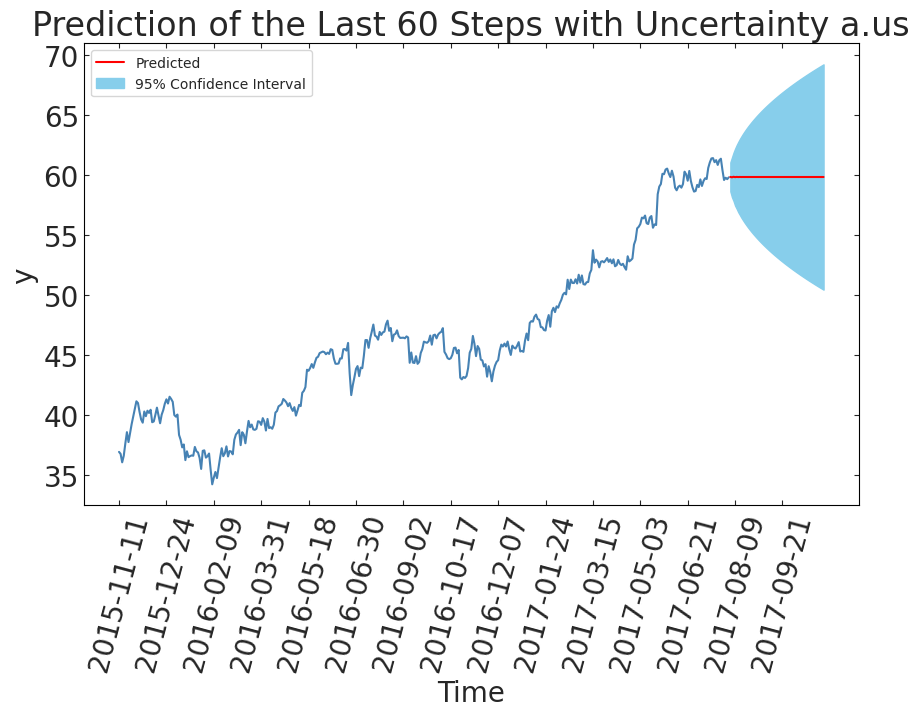

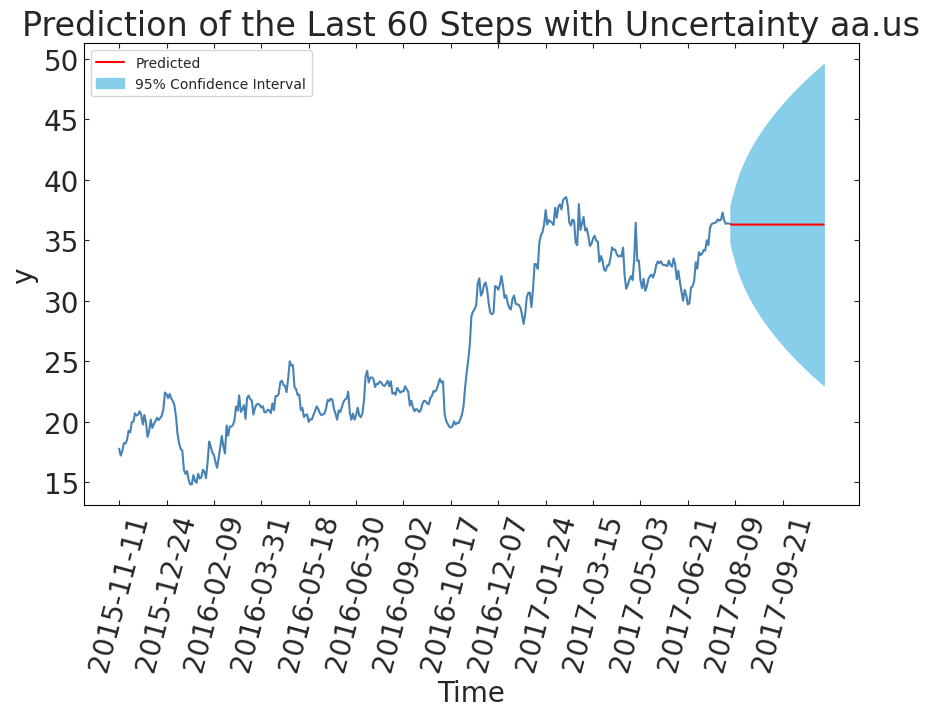

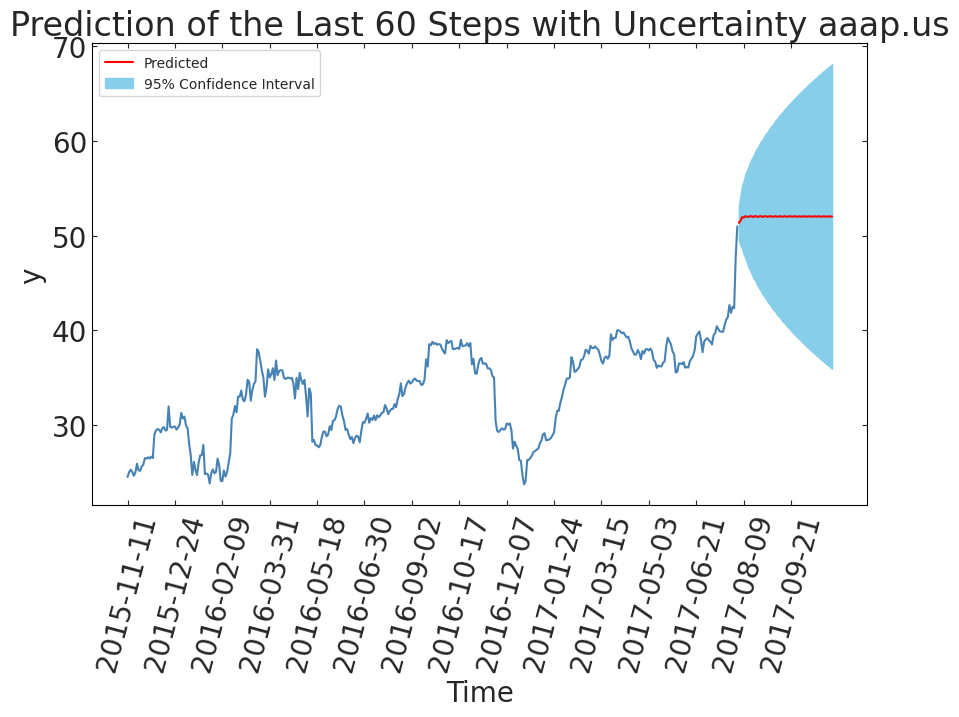

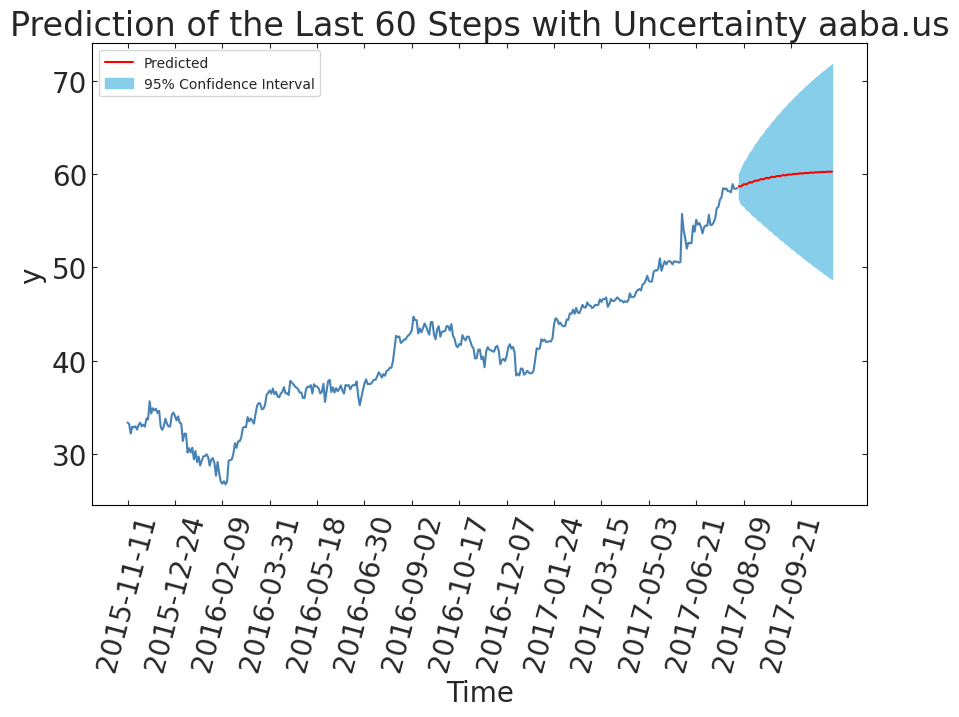

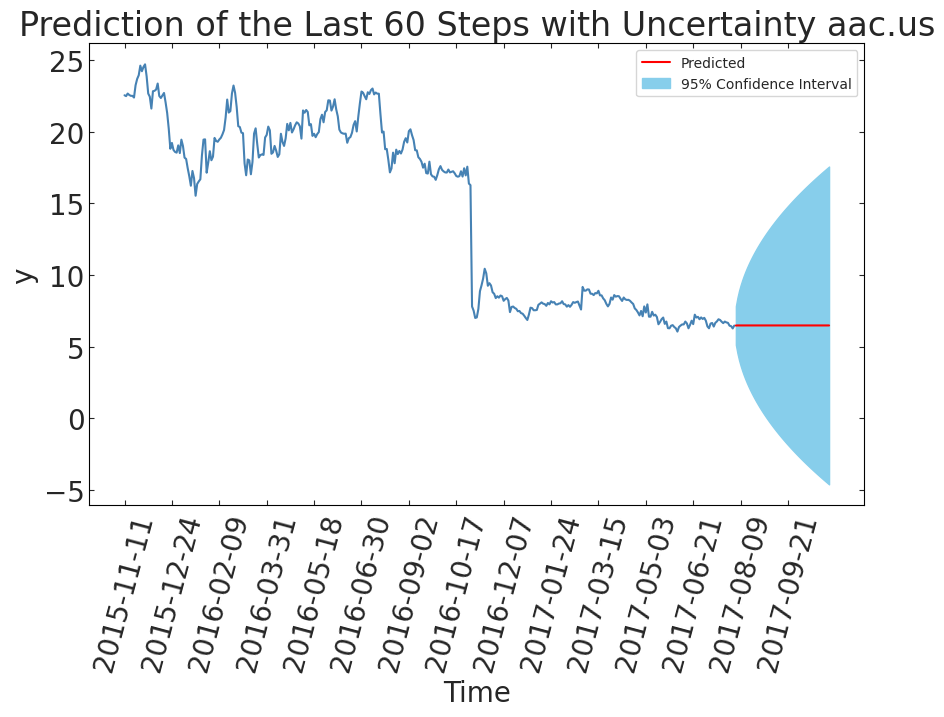

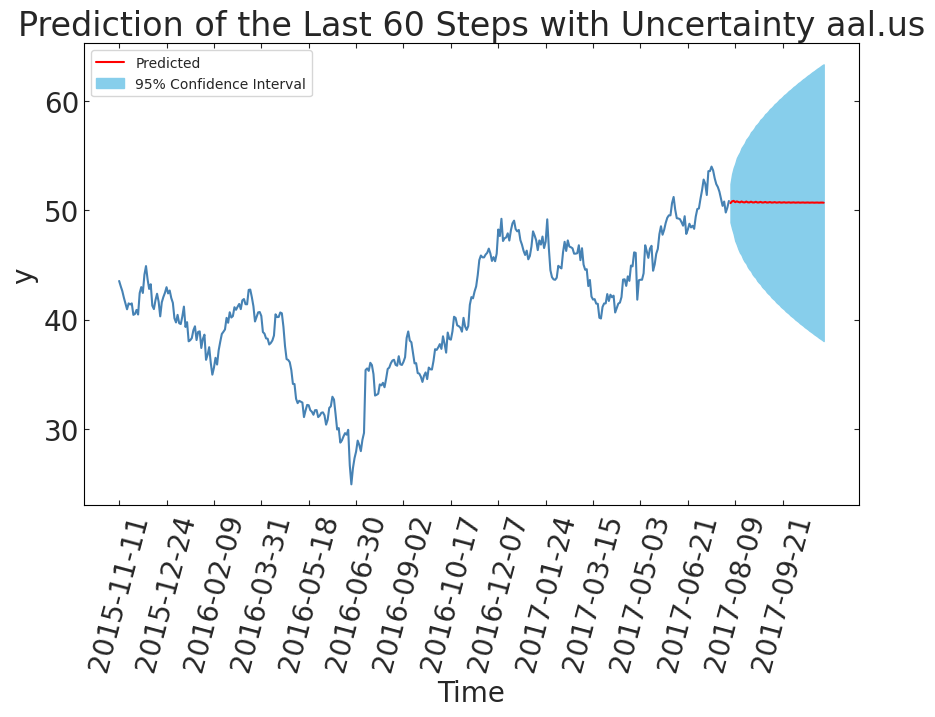

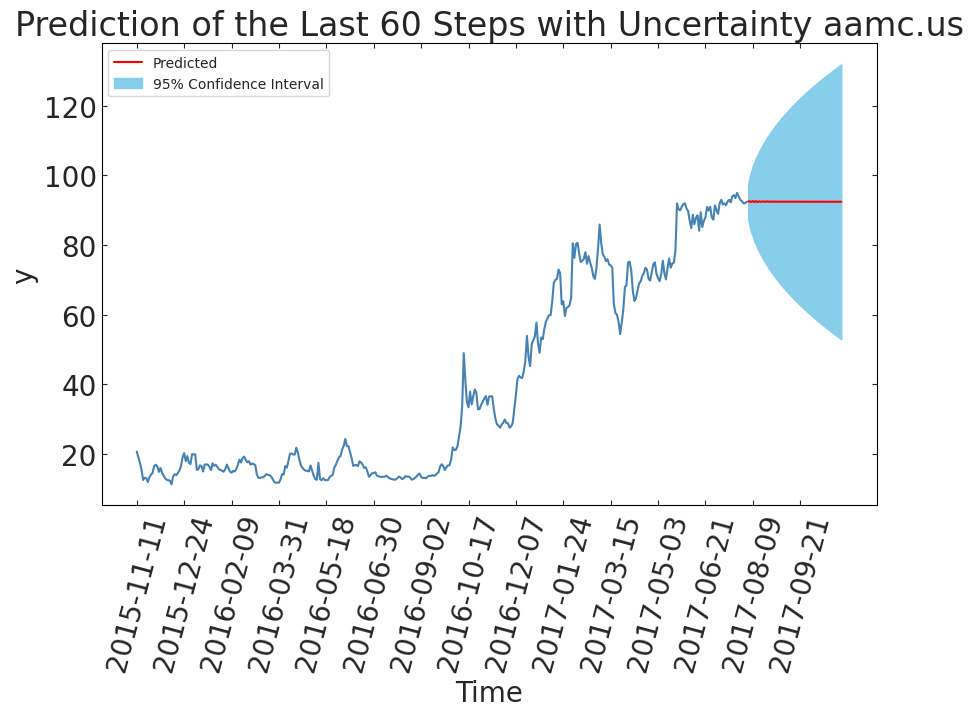

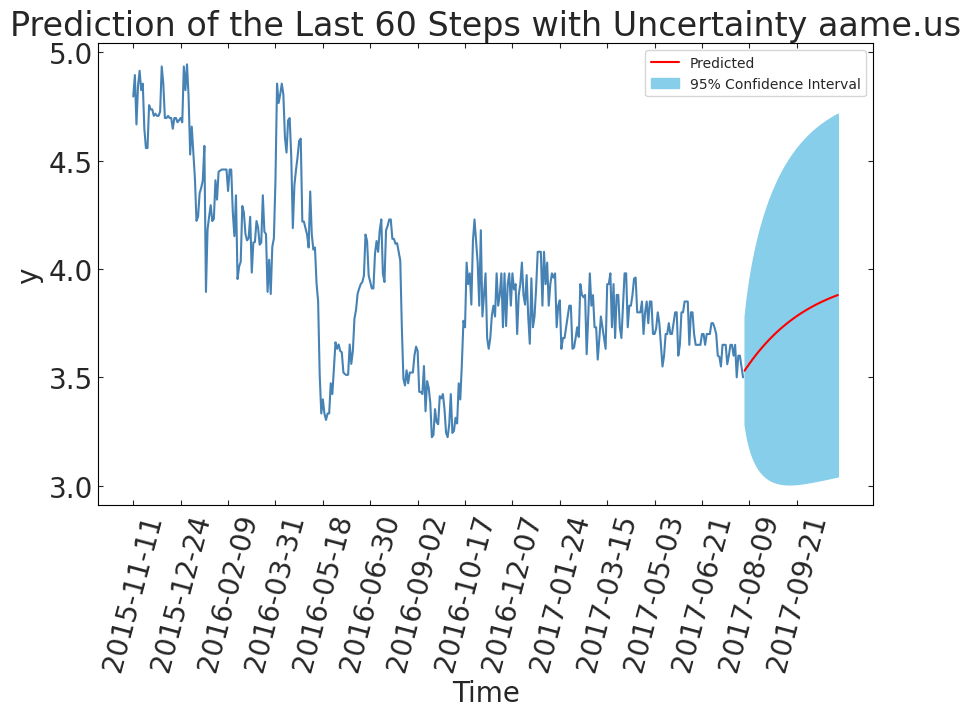

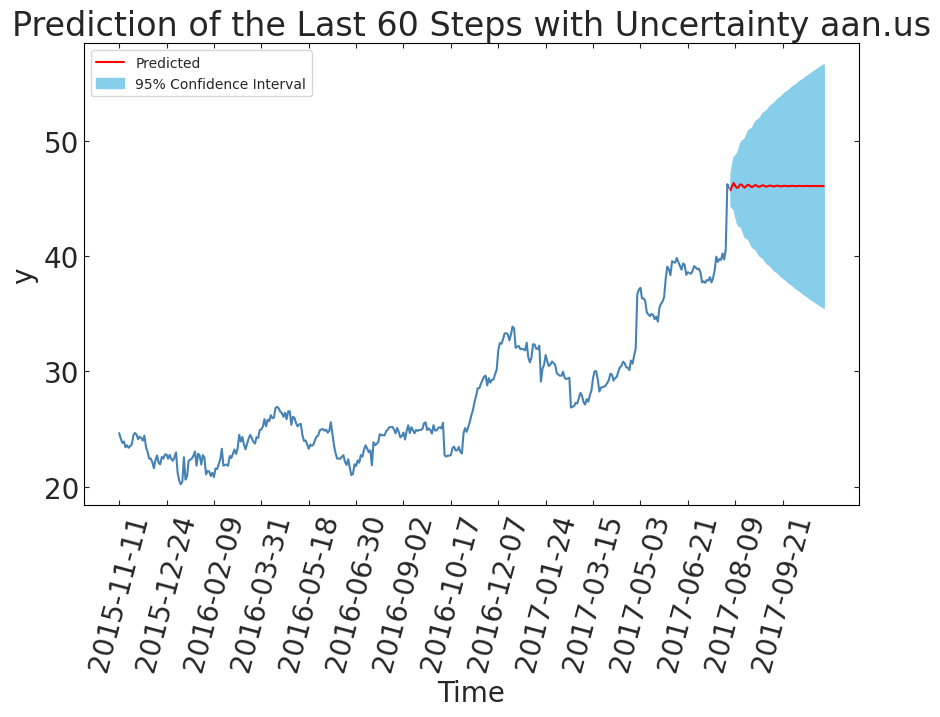

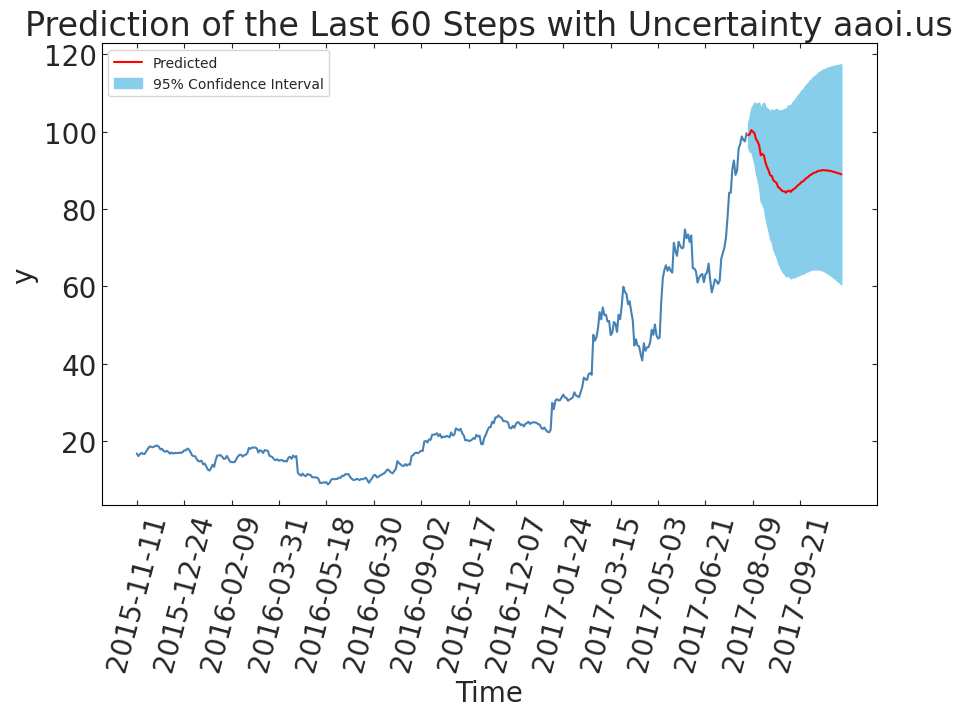

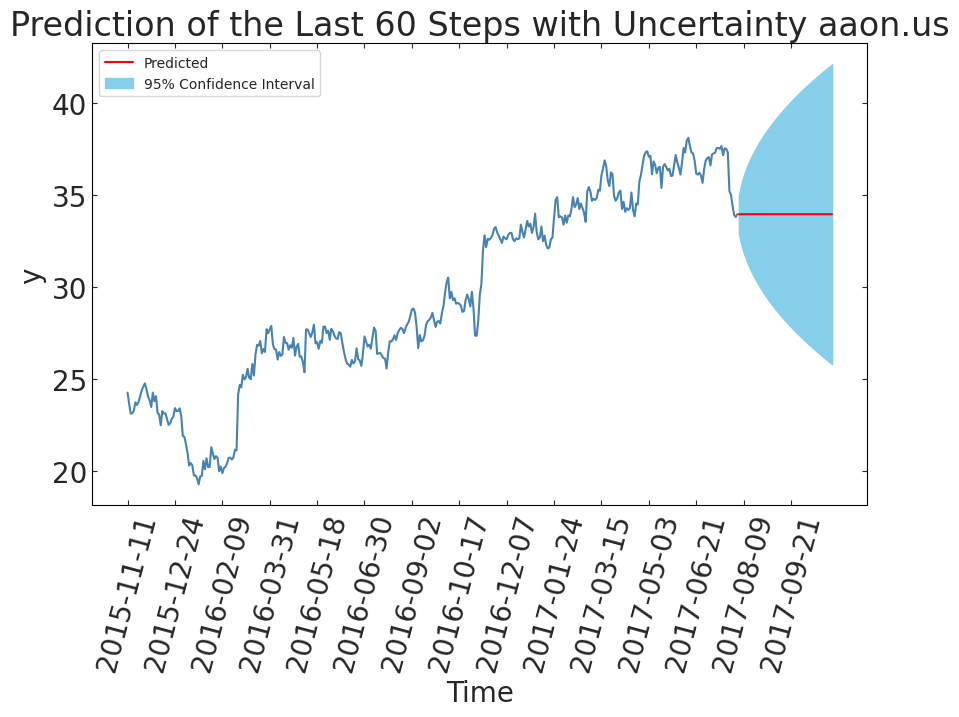

In [ ]:

for i, column_name in enumerate(tss.columns):

  plt.plot(tss.iloc[:-60].index, tss.iloc[:-60][column_name])#, rot=75, lw=2)

  forecast = modelFits[i].get_forecast(60)
  yhat = forecast.predicted_mean
  yhat_conf_int = forecast.conf_int(alpha=0.05)

  # Plot the predictions with uncertainty
  plt.plot(tss.iloc[-60:].index, yhat, label="Predicted", color="red")
  plt.fill_between(tss.iloc[-60:].index,  yhat_conf_int["lower " + column_name],
                  yhat_conf_int["upper " + column_name],
                  color="skyblue",
                  label="95% Confidence Interval")
  plt.xticks(tss.index[::30], rotation=75)
  plt.xlabel("Time")
  plt.ylabel("y")
  plt.title(f"Prediction of the Last 60 Steps with Uncertainty {column_name}")
  plt.legend(fontsize=10)
  plt.show()

FIG 5: Above are plots of each of the time series with the ARIMA predictions on the last 60 points of the dataset: the testing set. The main difference between these plots and Figure 1 is in the far right. Here, the red line represents the predicted values, and the shaded blue region is the 95% confidence interval surrounding those predictions. In every case, the confidence interval fans out, which is to be expected since we showed that, for the most part, each observation is heavily influenced by the prevous one. Thus, our predictions become less accurate the further away from the data we go.